<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#아래의-데이터를--8:2로-나누세요" data-toc-modified-id="아래의-데이터를--8:2로-나누세요-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>아래의 데이터를  8:2로 나누세요</a></span></li><li><span><a href="#Training-data-set을-가지고-SARIMA-모델의-최적의-매개변수를-구하고-test-set을-예측해보세요" data-toc-modified-id="Training-data-set을-가지고-SARIMA-모델의-최적의-매개변수를-구하고-test-set을-예측해보세요-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training data set을 가지고 SARIMA 모델의 최적의 매개변수를 구하고 test set을 예측해보세요</a></span></li><li><span><a href="#모델을-가지고-정확도와-데이터의-특징을-해석해보세요." data-toc-modified-id="모델을-가지고-정확도와-데이터의-특징을-해석해보세요.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>모델을 가지고 정확도와 데이터의 특징을 해석해보세요.</a></span></li></ul></div>

# 아래의 데이터를  8:2로 나누세요 
# Training data set을 가지고 SARIMA 모델의 최적의 매개변수를 구하고 test set을 예측해보세요 
# 모델을 가지고 정확도와 데이터의 특징을 해석해보세요. 

In [155]:
import pandas as pd 
df = pd.read_csv('sarima_data.csv')

In [156]:
df

,date,sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946
...,...,...
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413


In [157]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")
df.set_index("date", inplace = True)

In [158]:
df.dtypes

sales    int64
dtype: object

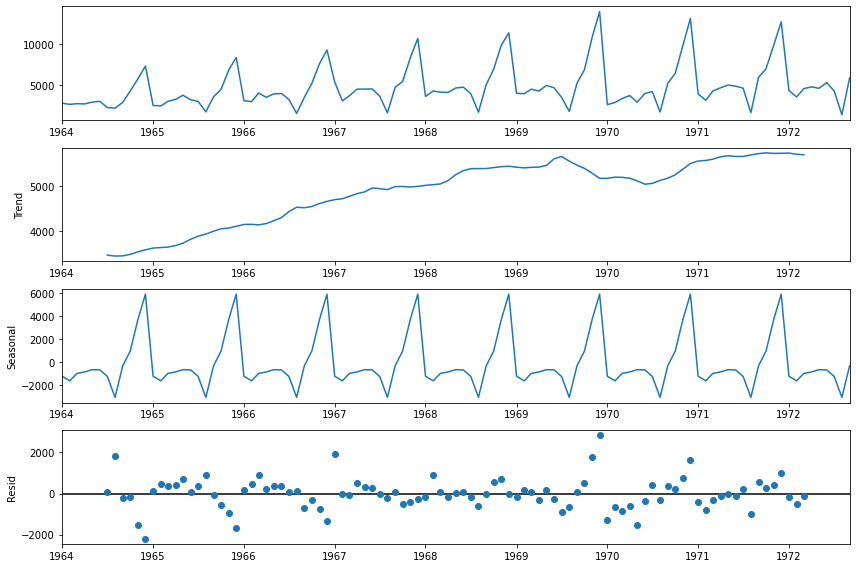

In [159]:
# 시계열 데이터의 추세, 계절, 순환 요인등을 시각화
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result_plot = seasonal_decompose(df)

result_plot.plot()
plt.show()

In [160]:
train_set_len = int(df.shape[0] * 0.8)
train_set = df.iloc[:train_set_len]
test_set = df.drop(train_set.index, axis = 0)

In [161]:
# 정상성 검정
from statsmodels.tsa.stattools import adfuller

adf = adfuller(train_set, regression = "ct")

print("ADF-Statistic : {}".format(adf[0]))
print("P-value : {}".format(adf[1]))

ADF-Statistic : 2.431134386321719
P-value : 1.0


<AxesSubplot:xlabel='date'>

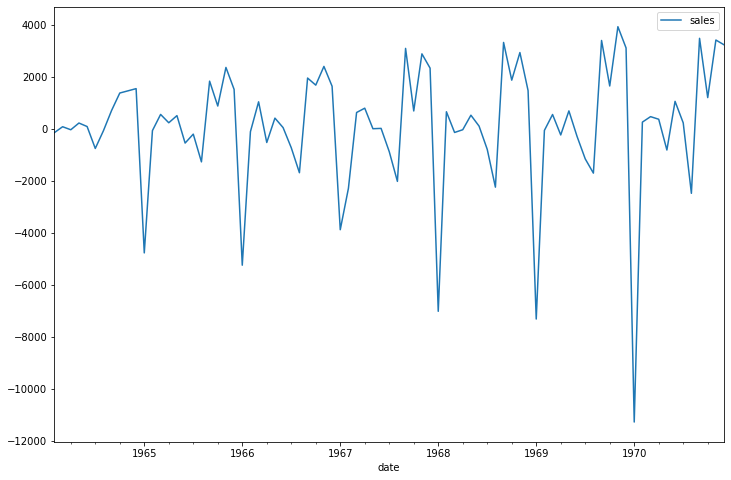

In [162]:
# 정상성을 만족하지 않으므로 차분 실시
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data  = train_set.diff(1).dropna()

diff_data.plot()

In [163]:
# 차분한 데이터로 다시 정상성 확인
from statsmodels.tsa.stattools import adfuller

diff1_adf = adfuller(diff_data)

print("ADF-Statistic : {}".format(diff1_adf[0]))
print("P-value : {}".format(diff1_adf[1])) # 정상성을 만족

ADF-Statistic : -21.725876749107655
P-value : 0.0


C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


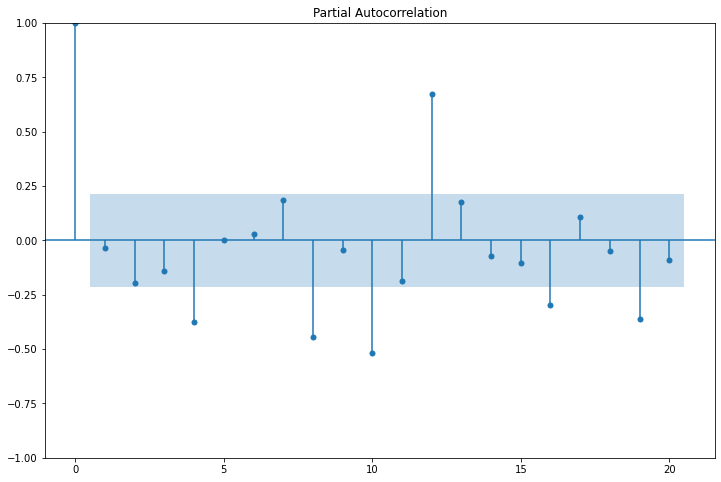

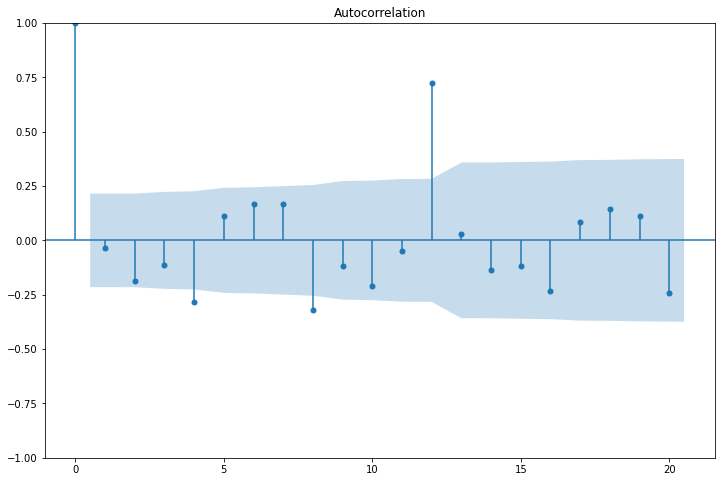

In [164]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_pacf(diff_data)
plot_acf(diff_data)
plt.show()

In [165]:
# ARIMA 모형이 (0,1,0) 값을 가짐

from pmdarima import auto_arima

auto_model = auto_arima(train_set, start_P = 1, D=1, Q = 1,\
                       max_P = 10, max_D = 10, max_Q = 10, m = 6,
                       trace = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[6] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=1496.477, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=1495.072, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[6] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[6] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(1,1,1)[6] intercept   : AIC=1332.359, Time=0.30 sec
 ARIMA(0,0,0)(2,1,1)[6] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(1,1,2)[6] intercept   : AIC=1335.461, Time=1.19 sec
 ARIMA(0,0,0)(0,1,2)[6] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(2,1,0)[6] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(2,1,2)[6] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(1,0,0)(1,1,1)[6] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,1)(1,1,1)[6] intercept   : AIC=1323.031, Time=0.26 sec
 ARIMA(0,0,1)(1,1

In [166]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 6)   Log Likelihood                -654.270
Date:                            Mon, 25 Apr 2022   AIC                           1318.540
Time:                                    19:56:28   BIC                           1330.324
Sample:                                         0   HQIC                          1323.258
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    206.3381    143.759      1.435      0.151     -75.424     488.100
ar.L1          0.6178      0.149      4.140      0.000       0.325       0.910
ma.L1         -0.1730      0.227     -0.762      0.446      -0.618       0.272
ar.S.L6       -1.0000      0.040    -24.932      0.000      -1.079      -0.921
sigma2      9.189e+05   1.16e+05      7.915      0.000    6.91e+05    1.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                16.97
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.16
Prob(H) (two-sided):                  0.18   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
prediction = pd.DataFrame(auto_model.predict(n_periods = len(test_set)),
                         index = test_set.index)

prediction.columns = ["predicted_price"]

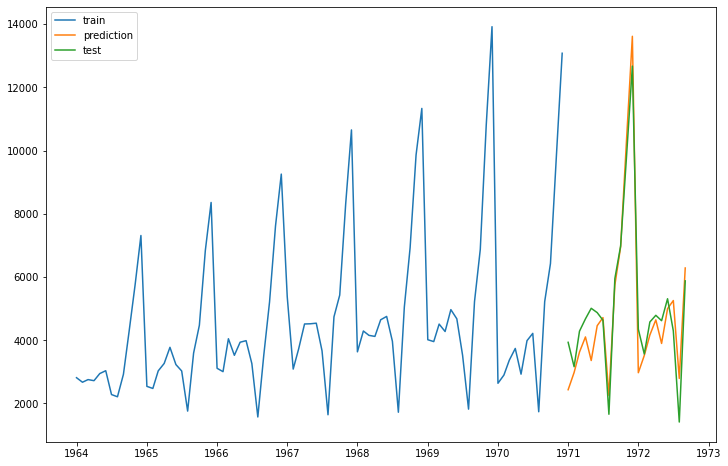

In [168]:
import matplotlib.pyplot as plt

plt.plot(train_set, label = "train")
plt.plot(prediction, label = "prediction")
plt.plot(test_set, label = "test")

plt.legend()
plt.show()

In [172]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(r2_score(test_set, prediction))

0.890607697252046


In [175]:
# rmse 계산
import numpy as np
# prediction
# rmse = np.sqrt(np.sum((test_set["sales"] - prediction["predicted_price"])**2)/len(prediction))
mse = mean_squared_error(test_set["sales"], prediction["predicted_price"])
np.sqrt(rmse)

792.6403572417379